In [27]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [28]:
# Load dataset
df1 = pd.read_csv("data/2022-06-08-enriched.csv")
df2 = pd.read_csv("data/2022-06-09-enriched.csv")
df3 = pd.read_csv("data/2022-06-27-enriched.csv")
df4 = pd.read_csv("data/2022-07-04-enriched.csv")
df5 = pd.read_csv("data/2022-12-09-enriched.csv")

In [29]:
# Combining all datasets
combined_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [30]:
combined_df.head()

,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,notes,grp,pub_date,cvss,cwe,vector,complexity,severity
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-78,NETWORK,LOW,CRITICAL
1,CVE-2021-27102,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,7.8,CWE-78,LOCAL,LOW,HIGH
2,CVE-2021-27101,accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-89,NETWORK,LOW,CRITICAL
3,CVE-2021-27103,accellion,FTA,Accellion FTA SSRF Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-918,NETWORK,LOW,CRITICAL
4,CVE-2021-21017,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Acrobat Reader DC versions versions 2020.013.2...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-11,8.8,CWE-787,NETWORK,LOW,HIGH


In [31]:
combined_df.shape

(3984, 16)

In [32]:
combined_df = combined_df.dropna(subset=['short_description', 'severity'])

X = combined_df['short_description']
y = combined_df['severity']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [34]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [35]:
# Hyperparameter tuning using GridSearchCV
param_grid = {'alpha': [0.0005, 0.1, 0.5, 1.0]}
nb_classifier = MultinomialNB()
grid_search = GridSearchCV(nb_classifier, param_grid, cv=3)
grid_search.fit(X_train_vectorized, y_train)

# Get the best alpha value from the grid search
best_alpha = grid_search.best_params_['alpha']

# Retrain the model on the entire training set with the best hyperparameters
final_nb_classifier = MultinomialNB(alpha=best_alpha)
final_nb_classifier.fit(X_train_vectorized, y_train)

# Use the final model for predictions on the test set
y_pred = final_nb_classifier.predict(X_test_vectorized)

In [36]:
# Evaluate the final model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the formatted evaluation metrics
print(f"Accuracy: {accuracy:.4f}\n")

print("Confusion Matrix:")
confusion_df = pd.DataFrame(confusion_mat, index=['CRITICAL', 'HIGH', 'LOW', 'MEDIUM'], columns=['CRITICAL', 'HIGH', 'LOW', 'MEDIUM'])
print(confusion_df.to_string())

print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.9736

Confusion Matrix:
          CRITICAL  HIGH  LOW  MEDIUM
CRITICAL       175     5    0       0
HIGH             4   268    0       2
LOW              0     0    1       0
MEDIUM           0     2    0      35

Classification Report:
              precision    recall  f1-score   support

    CRITICAL       0.98      0.97      0.97       180
        HIGH       0.97      0.98      0.98       274
         LOW       1.00      1.00      1.00         1
      MEDIUM       0.95      0.95      0.95        37

    accuracy                           0.97       492
   macro avg       0.97      0.97      0.97       492
weighted avg       0.97      0.97      0.97       492



In [37]:
# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1.0]}
lg_classifier = LogisticRegression()
grid_search = GridSearchCV(lg_classifier, param_grid, cv=3)
grid_search.fit(X_train_vectorized, y_train)

# Get the best alpha value from the grid search
best_c = grid_search.best_params_['C']

# Retrain the model on the entire training set with the best hyperparameters
final_lg_classifier = LogisticRegression(C=best_c)
final_lg_classifier.fit(X_train_vectorized, y_train)

# Use the final model for predictions on the test set
y_pred = final_lg_classifier.predict(X_test_vectorized)

In [38]:
# Evaluate the final model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred,  zero_division = np.nan)

# Print the formatted evaluation metrics
print(f"Accuracy: {accuracy:.4f}\n")

print("Confusion Matrix:")
confusion_df = pd.DataFrame(confusion_mat, index=['CRITICAL', 'HIGH', 'LOW', 'MEDIUM'], columns=['CRITICAL', 'HIGH', 'LOW', 'MEDIUM'], )
print(confusion_df.to_string())

print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.9573

Confusion Matrix:
          CRITICAL  HIGH  LOW  MEDIUM
CRITICAL       174     6    0       0
HIGH             4   270    0       0
LOW              0     0    0       1
MEDIUM           2     8    0      27

Classification Report:
              precision    recall  f1-score   support

    CRITICAL       0.97      0.97      0.97       180
        HIGH       0.95      0.99      0.97       274
         LOW        nan      0.00      0.00         1
      MEDIUM       0.96      0.73      0.83        37

    accuracy                           0.96       492
   macro avg       0.96      0.67      0.69       492
weighted avg       0.96      0.96      0.96       492



In [39]:
# Hyperparameter tuning using GridSearchCV
param_grid = {'n_estimators': [50, 100, 200]}
rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(rf_classifier, param_grid, cv=3)
grid_search.fit(X_train_vectorized, y_train)

# Get the best alpha value from the grid search
best_n_est = grid_search.best_params_['n_estimators']

# Retrain the model on the entire training set with the best hyperparameters
final_rf_classifier = RandomForestClassifier(n_estimators=best_n_est)
final_rf_classifier.fit(X_train_vectorized, y_train)

# Use the final model for predictions on the test set
y_pred = final_rf_classifier.predict(X_test_vectorized)

In [40]:
# Evaluate the final model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred,  zero_division = np.nan)

# Print the formatted evaluation metrics
print(f"Accuracy: {accuracy:.4f}\n")

print("Confusion Matrix:")
confusion_df = pd.DataFrame(confusion_mat, index=['CRITICAL', 'HIGH', 'LOW', 'MEDIUM'], columns=['CRITICAL', 'HIGH', 'LOW', 'MEDIUM'], )
print(confusion_df.to_string())

print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.9959

Confusion Matrix:
          CRITICAL  HIGH  LOW  MEDIUM
CRITICAL       180     0    0       0
HIGH             2   272    0       0
LOW              0     0    1       0
MEDIUM           0     0    0      37

Classification Report:
              precision    recall  f1-score   support

    CRITICAL       0.99      1.00      0.99       180
        HIGH       1.00      0.99      1.00       274
         LOW       1.00      1.00      1.00         1
      MEDIUM       1.00      1.00      1.00        37

    accuracy                           1.00       492
   macro avg       1.00      1.00      1.00       492
weighted avg       1.00      1.00      1.00       492



In [41]:
# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1.0, 10.0], 'gamma': ['scale', 'auto']}
svc_classifier = SVC()
grid_search = GridSearchCV(svc_classifier, param_grid, cv=3)
grid_search.fit(X_train_vectorized, y_train)

# Get the best alpha value from the grid search
best_c = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']


# Retrain the model on the entire training set with the best hyperparameters
final_svc_classifier = SVC(C=best_c , gamma=best_gamma)
final_svc_classifier.fit(X_train_vectorized, y_train)

# Use the final model for predictions on the test set
y_pred = final_svc_classifier.predict(X_test_vectorized)

In [42]:
# Evaluate the final model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred,  zero_division = np.nan)

# Print the formatted evaluation metrics
print(f"Accuracy: {accuracy:.4f}\n")

print("Confusion Matrix:")
confusion_df = pd.DataFrame(confusion_mat, index=['CRITICAL', 'HIGH', 'LOW', 'MEDIUM'], columns=['CRITICAL', 'HIGH', 'LOW', 'MEDIUM'], )
print(confusion_df.to_string())

print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.9939

Confusion Matrix:
          CRITICAL  HIGH  LOW  MEDIUM
CRITICAL       180     0    0       0
HIGH             3   271    0       0
LOW              0     0    1       0
MEDIUM           0     0    0      37

Classification Report:
              precision    recall  f1-score   support

    CRITICAL       0.98      1.00      0.99       180
        HIGH       1.00      0.99      0.99       274
         LOW       1.00      1.00      1.00         1
      MEDIUM       1.00      1.00      1.00        37

    accuracy                           0.99       492
   macro avg       1.00      1.00      1.00       492
weighted avg       0.99      0.99      0.99       492



In [43]:
# Hyperparameter tuning using GridSearchCV
param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5]}
gb_classifier = GradientBoostingClassifier()
grid_search = GridSearchCV(gb_classifier, param_grid, cv=3)
grid_search.fit(X_train_vectorized, y_train)

# Get the best alpha value from the grid search
best_n_est = grid_search.best_params_['n_estimators']
best_lr = grid_search.best_params_['learning_rate']


# Retrain the model on the entire training set with the best hyperparameters
final_gb_classifier = GradientBoostingClassifier(n_estimators=best_n_est, learning_rate=best_lr)
final_gb_classifier.fit(X_train_vectorized, y_train)

# Use the final model for predictions on the test set
y_pred = final_gb_classifier.predict(X_test_vectorized)

In [44]:
# Evaluate the final model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred,  zero_division = np.nan)

# Print the formatted evaluation metrics
print(f"Accuracy: {accuracy:.4f}\n")

print("Confusion Matrix:")
confusion_df = pd.DataFrame(confusion_mat, index=['CRITICAL', 'HIGH', 'LOW', 'MEDIUM'], columns=['CRITICAL', 'HIGH', 'LOW', 'MEDIUM'], )
print(confusion_df.to_string())

print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.9959

Confusion Matrix:
          CRITICAL  HIGH  LOW  MEDIUM
CRITICAL       180     0    0       0
HIGH             2   272    0       0
LOW              0     0    1       0
MEDIUM           0     0    0      37

Classification Report:
              precision    recall  f1-score   support

    CRITICAL       0.99      1.00      0.99       180
        HIGH       1.00      0.99      1.00       274
         LOW       1.00      1.00      1.00         1
      MEDIUM       1.00      1.00      1.00        37

    accuracy                           1.00       492
   macro avg       1.00      1.00      1.00       492
weighted avg       1.00      1.00      1.00       492



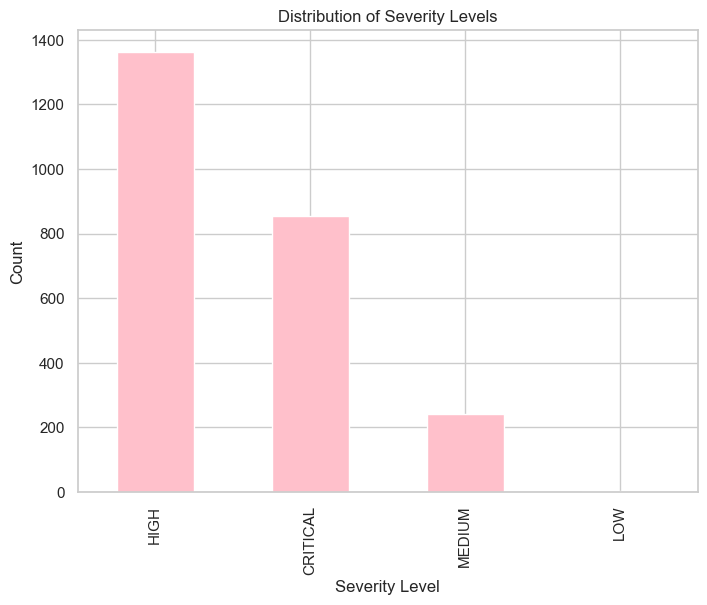

In [45]:

plt.figure(figsize=(8, 6))
combined_df['severity'].value_counts().plot(kind='bar', color='pink')
plt.title('Distribution of Severity Levels')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.show()


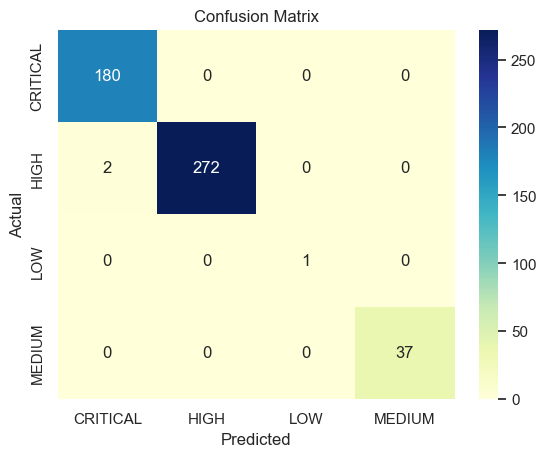

In [46]:
import seaborn as sns

sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=['CRITICAL', 'HIGH', 'LOW', 'MEDIUM'], 
            yticklabels=['CRITICAL', 'HIGH', 'LOW','MEDIUM'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

/var/folders/nn/l8j1s99100s_wc7w5ghth_z00000gn/T/ipykernel_2889/1459319671.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='severity', data=combined_df, palette='Set2')


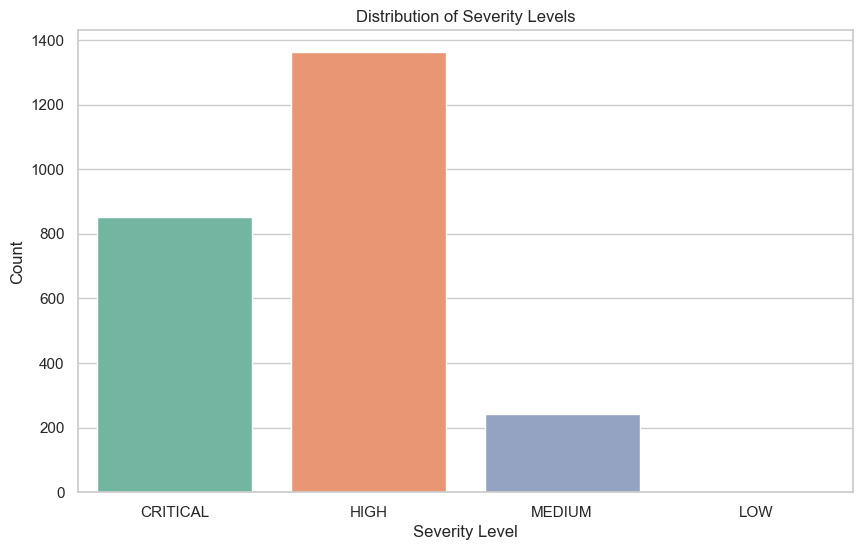

In [47]:
# Distribution Prior to Classification

# Setting the style
sns.set(style="whitegrid")

# Creating the histogram
plt.figure(figsize=(10, 6))
sns.countplot(x='severity', data=combined_df, palette='Set2')

# Adding titles and labels
plt.title('Distribution of Severity Levels')
plt.xlabel('Severity Level')
plt.ylabel('Count')

# Display the plot
plt.show()

In [48]:

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)

def evaluate_models(models, model_names, X_test, y_test, average='weighted', class_labels=None):
    results = []

    for model, name in zip(models, model_names):
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average=average, zero_division=0)
        recall = recall_score(y_test, y_pred, average=average, zero_division=0)
        f1 = f1_score(y_test, y_pred, average=average, zero_division=0)

        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1
        })

        '''# Show confusion matrix
        cm = confusion_matrix(y_test, y_pred, labels=class_labels)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
        disp.plot(cmap='Blues')
        plt.title(f'Confusion Matrix - {name}')
        plt.grid(False)
        plt.show()'''

    # Create DataFrame
    df_results = pd.DataFrame(results)

    # Plot grouped bar chart
    df_results.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(
        kind='bar', figsize=(12, 6), colormap='viridis')

    plt.title('Model Performance Comparison')
    plt.ylabel('Score')
    plt.ylim(0.5, 1.0)
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

    return df_results

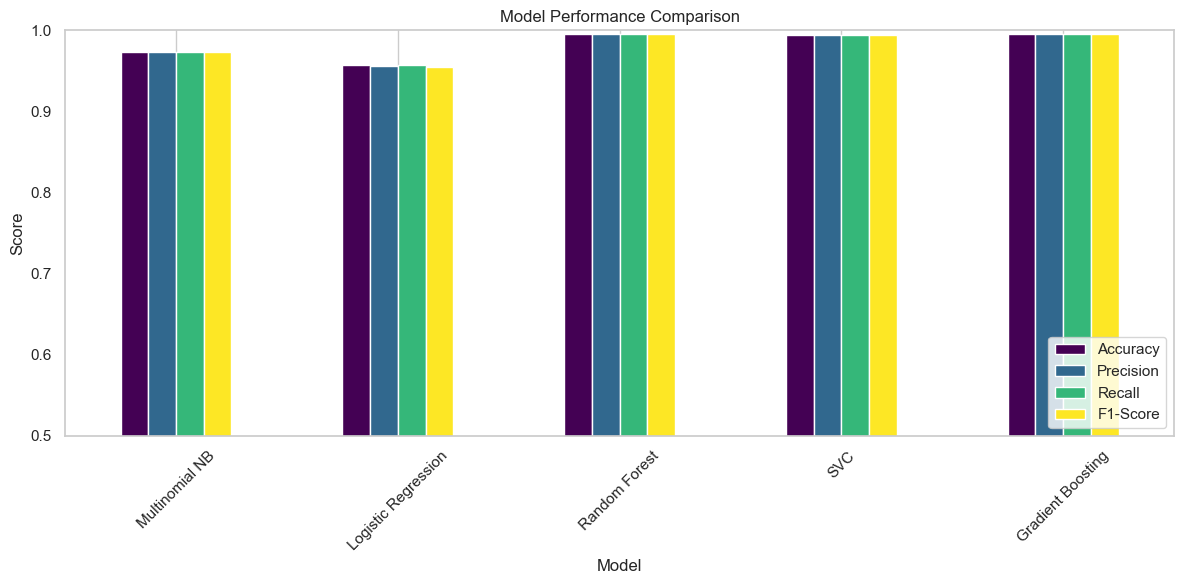

,Model,Accuracy,Precision,Recall,F1-Score
0,Multinomial NB,0.973577,0.973584,0.973577,0.973576
1,Logistic Regression,0.957317,0.955633,0.957317,0.955081
2,Random Forest,0.995935,0.995980,0.995935,0.995939
3,SVC,0.993902,0.994002,0.993902,0.993911
4,Gradient Boosting,0.995935,0.995980,0.995935,0.995939


In [49]:
# List of trained models
models = [final_nb_classifier, final_lg_classifier, final_rf_classifier, final_svc_classifier, final_gb_classifier]
model_names = ['Multinomial NB', 'Logistic Regression', 'Random Forest', 'SVC', 'Gradient Boosting']

# Assuming your test data is vectorized already
evaluate_models(models, model_names, X_test_vectorized, y_test, class_labels=['CRITICAL', 'HIGH', 'LOW', 'MEDIUM'])

In [50]:
import os
import joblib
from sklearn.metrics import f1_score

# Step 1: Define models and names
models = [final_nb_classifier, final_lg_classifier, final_rf_classifier, final_svc_classifier, final_gb_classifier]
model_names = ['Multinomial NB', 'Logistic Regression', 'Random Forest', 'SVC', 'Gradient Boosting']

# Step 2: Evaluate each model
model_scores = []

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test_vectorized)
    f1 = f1_score(y_test, y_pred, average='weighted')
    model_scores.append((name, model, f1))
    print(f"🔍 {name}: F1 Score = {f1:.4f}")

# Step 3: Select best model
best_model_name, best_model, best_f1 = max(model_scores, key=lambda x: x[2])
print(f"\n✅ Best Model: {best_model_name} (F1 Score = {best_f1:.4f})")

# Create folder
os.makedirs('models', exist_ok=True)

# Step 4: Save best model and vectorizer
joblib.dump(best_model, 'models/best_model.pkl')
joblib.dump(vectorizer, 'models/tfidf.pkl')
print("✅ Model and vectorizer saved to 'models/' folder.")

# Optional: Save model scores to CSV
df_scores = pd.DataFrame([
    {'Model': name, 'F1 Score': score}
    for name, _, score in model_scores
])
df_scores.to_csv('model_scores.csv', index=False)
print("📄 All model scores saved to 'model_scores.csv'.")

🔍 Multinomial NB: F1 Score = 0.9736
🔍 Logistic Regression: F1 Score = 0.9551
🔍 Random Forest: F1 Score = 0.9959
🔍 SVC: F1 Score = 0.9939
🔍 Gradient Boosting: F1 Score = 0.9959

✅ Best Model: Random Forest (F1 Score = 0.9959)
✅ Model and vectorizer saved to 'models/' folder.
📄 All model scores saved to 'model_scores.csv'.
